In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from matplotlib import font_manager, rc
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14

In [3]:
raw_df = pd.read_csv(r'C:\Users\junoh\OneDrive\이너피플\git\두두월드\고겍세분화_dudu_221008.csv')

In [4]:
raw_df.head()

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,주소_도시급,주소_시군구급,회원그룹,구매건수,구매금액,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로
0,20210901000757-68539640174,20210901000757-68539640174_[1],S-21090100-260412059-01,13003000002,사각실속기프트세트,NaN,M83-0000000000000001,1,11900,11900,...,충남,당진시,그린(일반),1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
1,20210901000757-68539640174,20210901000757-68539640174_[2],S-21090100-260412059-00,13007000013,"납작이 1+1세트,홈쇼핑구성",NaN,M1301-00000000000001,1,54000,54000,...,충남,당진시,그린(일반),1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
2,20210901001324-15711112237,20210901001324-15711112237_[1],S-21090100-407834699-04,14006000052,슬라이딩트레이3개세트,NaN,M374-000000000000001,1,6900,6900,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
3,20210901001324-15711112237,20210901001324-15711112237_[2],S-21090100-407834699-03,14007000004,서랍칸 다용도박스 세트,,M390-000000000000002,1,6800,12000,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
4,20210901001324-15711112237,20210901001324-15711112237_[3],S-21090100-407834699-02,14005000002,원더바스켓 일자 확장형 선반,NaN,M410-000000000000001,1,12900,12900,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30344 entries, 0 to 30343
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               30344 non-null  object 
 1   품목별 주문번호           30344 non-null  object 
 2   배송번호               30344 non-null  object 
 3   주문상품코드             30344 non-null  object 
 4   주문상품명              30344 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  7157 non-null   object 
 6   옵션별상품코드            30344 non-null  object 
 7   주문품목 수량            30344 non-null  int64  
 8   주문품목 단가            30344 non-null  int64  
 9   주문품목 결제금액          30344 non-null  int64  
 10  주문일시               30344 non-null  object 
 11  주문경로               29371 non-null  object 
 12  주문검색어              23071 non-null  object 
 13  구매횟수               30343 non-null  float64
 14  결제금액(주문전체)         30344 non-null  int64  
 15  결제금액(품목별)          30344 non-null  int64  
 16  결제방법               303

#### 데이터 전처리

In [6]:
# columne 별 결측값 확인
raw_df.isnull().sum()

주문번호                     0
품목별 주문번호                 0
배송번호                     0
주문상품코드                   0
주문상품명                    0
상품옵션(옵션가격/타이틀미노출)    23187
옵션별상품코드                  0
주문품목 수량                  0
주문품목 단가                  0
주문품목 결제금액                0
주문일시                     0
주문경로                   973
주문검색어                 7273
구매횟수                     1
결제금액(주문전체)               0
결제금액(품목별)                0
결제방법                     0
결제상태                     0
주문상태(품목별)                0
입금확인일(결제일)             835
송장입력일                 2108
배송중처리일                2108
배송완료일                 2129
거래완료일                 2531
개인/기업                    0
회원가입일                    1
유입경로                     0
연계주문                  6428
상품 총금액                1736
최초 결제 금액                 0
상품번호                     0
대분류                      0
브랜드                      0
상품 검색어                   0
상품등록일                    0
아이디                      0
가입일                      0
회

In [7]:
# 거래완료일의 결측값이 있는 행은 거래가 이루어지지 않은 것으로 간주. --> 행 삭제 
df = raw_df.dropna(axis = 'index', subset=['거래완료일'], how = 'any')

In [8]:
# 결측 행 삭제 후 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 30343
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               27813 non-null  object 
 1   품목별 주문번호           27813 non-null  object 
 2   배송번호               27813 non-null  object 
 3   주문상품코드             27813 non-null  object 
 4   주문상품명              27813 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  6598 non-null   object 
 6   옵션별상품코드            27813 non-null  object 
 7   주문품목 수량            27813 non-null  int64  
 8   주문품목 단가            27813 non-null  int64  
 9   주문품목 결제금액          27813 non-null  int64  
 10  주문일시               27813 non-null  object 
 11  주문경로               26931 non-null  object 
 12  주문검색어              21152 non-null  object 
 13  구매횟수               27812 non-null  float64
 14  결제금액(주문전체)         27813 non-null  int64  
 15  결제금액(품목별)          27813 non-null  int64  
 16  결제방법               278

In [9]:
# 거래완료 된 건의 row 수 : 26,380건 확인. 
# 결측치 재확인

df.isnull().sum()

주문번호                     0
품목별 주문번호                 0
배송번호                     0
주문상품코드                   0
주문상품명                    0
상품옵션(옵션가격/타이틀미노출)    21215
옵션별상품코드                  0
주문품목 수량                  0
주문품목 단가                  0
주문품목 결제금액                0
주문일시                     0
주문경로                   882
주문검색어                 6661
구매횟수                     1
결제금액(주문전체)               0
결제금액(품목별)                0
결제방법                     0
결제상태                     0
주문상태(품목별)                0
입금확인일(결제일)               0
송장입력일                    0
배송중처리일                   0
배송완료일                    0
거래완료일                    0
개인/기업                    0
회원가입일                    1
유입경로                     0
연계주문                  5844
상품 총금액                  11
최초 결제 금액                 0
상품번호                     0
대분류                      0
브랜드                      0
상품 검색어                   0
상품등록일                    0
아이디                      0
가입일                      0
회

#### 고객 아이디 기준으로 고객별 특징 추출 
       - 이를 통해 RFM 분석을 위한 데이터 정제

In [10]:
len(df.아이디.unique())

6815

In [11]:
# 총 6,815개의 아이디로 구성. 즉 총 6,814 명의 고객
# 고객(아이디)별 최근성(Recency), 주문건수(Frequency), 구매금액(Monetary)  칼럼 생성 및 데이터 추출  --> 고객 군집화

In [12]:
# 고객 군집화를 위한 dataframe 생성
cluster_df = pd.DataFrame({'고객_id' : df.아이디.unique()})
cluster_df.head()
#cluster_df.info()

,고객_id
0,ja6227
1,ka@12ddd
2,lazurpleur
3,nh@5f65e332
4,pointhj01


In [13]:
# 주문건수(Frequency) 
#  1) 원 데이터프레임(df)의 고객(아이디)와 주문번호 기준으로 중복값 제거 후, 고객(아이디)별 갯수를 count --> 주문횟수가 됨 ( 이는 dataframe이 아닌, series 형태 )
num_order_by_id = df.drop_duplicates(subset =['아이디', '주문번호'])['아이디'].value_counts()

In [14]:
print(type(num_order_by_id))
num_order_by_id.head()

<class 'pandas.core.series.Series'>


nh@fde74b0    569
shenshop       18
nh@5fdacf4     18
jungliin       16
nh@2851d86     13
Name: 아이디, dtype: int64

In [15]:
#  고객_id를 num_order_by_id로 대체하여, cluster_df에 '주문횟수'를 생성
cluster_df['주문횟수'] = cluster_df['고객_id'].replace(num_order_by_id.to_dict())
cluster_df.head()
#cluster_df.주문횟수.unique()

,고객_id,주문횟수
0,ja6227,1
1,ka@12ddd,1
2,lazurpleur,1
3,nh@5f65e332,1
4,pointhj01,2


In [16]:
# 고객_id 별 주문품목 결제금액 
sum_pay_by_id = df.groupby('아이디')['주문품목 결제금액'].sum()
print(type(sum_pay_by_id))
cluster_df['주문금액합계'] = cluster_df.고객_id.replace(sum_pay_by_id.to_dict())
cluster_df.head()

<class 'pandas.core.series.Series'>


,고객_id,주문횟수,주문금액합계
0,ja6227,1,65900
1,ka@12ddd,1,49900
2,lazurpleur,1,36340
3,nh@5f65e332,1,9900
4,pointhj01,2,35390


In [17]:
# 고객_id별 주문품목 수량 
sum_qty_by_id = df.groupby('아이디')['주문품목 수량'].sum()
sum_qty_by_id.head()
cluster_df['주문량'] = cluster_df.고객_id.replace(sum_qty_by_id.to_dict())
cluster_df.head()
#  column 순서 변경
cluster_df = cluster_df[['고객_id',	'주문횟수',	'주문량', '주문금액합계']]
cluster_df.head()

,고객_id,주문횟수,주문량,주문금액합계
0,ja6227,1,2,65900
1,ka@12ddd,1,5,49900
2,lazurpleur,1,19,36340
3,nh@5f65e332,1,1,9900
4,pointhj01,2,14,35390


In [18]:
# 고객_id 별 평균가격 
cluster_df['평균가격'] = cluster_df.주문금액합계 / cluster_df.주문량
cluster_df.head()
#  column 순서 변경
cluster_df = cluster_df[['고객_id',	'주문횟수',	'주문량', '평균가격', '주문금액합계']]
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계
0,ja6227,1,2,32950.000000,65900
1,ka@12ddd,1,5,9980.000000,49900
2,lazurpleur,1,19,1912.631579,36340
3,nh@5f65e332,1,1,9900.000000,9900
4,pointhj01,2,14,2527.857143,35390


In [19]:
# 고객_id별 최근성(Recency)
# 총 거래 건 중 가장 최근일
df.주문일시.max()
# 최근일 + 1일을 최근성 기준일 선정 --> 2022-07-01 
base_date = pd.to_datetime('2022-07-01') 

recency_by_id = df.groupby('아이디')['주문일시'].max()
cluster_df['최근주문일'] = cluster_df.고객_id.replace(recency_by_id.to_dict())
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일
0,ja6227,1,2,32950.000000,65900,2021-09-01 0:07
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 0:13
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 0:23
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 0:28
4,pointhj01,2,14,2527.857143,35390,2022-03-27 0:22


In [20]:

cluster_df.최근주문일 = pd.to_datetime(cluster_df.최근주문일)
type(cluster_df.최근주문일)

diff = (base_date - cluster_df.최근주문일)
diff.head()
cluster_df['최근성'] = diff
cluster_df.head()
#type(cluster_df.iloc[0,6])

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302 days 23:53:00
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302 days 23:47:00
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302 days 23:37:00
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302 days 23:32:00
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95 days 23:38:00


In [21]:
cluster_df.info()
# 최근성의 dtype을 timedelta64에서 int로 변환 : dt.days 활용
cluster_df['최근성'] = cluster_df['최근성'].dt.days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   고객_id   6815 non-null   object         
 1   주문횟수    6815 non-null   int64          
 2   주문량     6815 non-null   int64          
 3   평균가격    6815 non-null   float64        
 4   주문금액합계  6815 non-null   int64          
 5   최근주문일   6815 non-null   datetime64[ns] 
 6   최근성     6815 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), timedelta64[ns](1)
memory usage: 372.8+ KB


In [22]:
cluster_df.info()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객_id   6815 non-null   object        
 1   주문횟수    6815 non-null   int64         
 2   주문량     6815 non-null   int64         
 3   평균가격    6815 non-null   float64       
 4   주문금액합계  6815 non-null   int64         
 5   최근주문일   6815 non-null   datetime64[ns]
 6   최근성     6815 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 372.8+ KB


,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95


In [23]:
# 고객_id 별 성별 
sex_df = df.drop_duplicates(subset = ['아이디', '성별'], keep = 'first')[['아이디','성별']]
sex_df.head()
cluster_df['sex'] = sex_df['성별'].to_list()
cluster_df.rename(columns = {'sex' :'성별'}, inplace = True)
cluster_df.head(10)

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여
5,ka@6090888f,1,6,2900.000000,17400,2021-09-01 01:17:00,302,선택안함
6,nh@12e4300,1,4,11650.000000,46600,2021-09-01 01:37:00,302,여
7,ka@14f2d30,1,7,5971.428571,41800,2021-09-01 02:52:00,302,여
8,peo0318,1,3,10800.000000,32400,2021-09-01 08:02:00,302,여
9,zeroyy2,1,3,16200.000000,48600,2021-09-01 08:24:00,302,여


In [24]:
#고객_id별 나이 추가
age_df = df.drop_duplicates(subset = ['아이디', '나이'], keep = 'first')[['아이디','나이']]
age_df.head()
cluster_df['age'] = age_df['나이'].to_list()
cluster_df.rename(columns = {'age' :'나이'}, inplace = True)
cluster_df.head(10)

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40
5,ka@6090888f,1,6,2900.000000,17400,2021-09-01 01:17:00,302,선택안함,확인불가
6,nh@12e4300,1,4,11650.000000,46600,2021-09-01 01:37:00,302,여,51
7,ka@14f2d30,1,7,5971.428571,41800,2021-09-01 02:52:00,302,여,37
8,peo0318,1,3,10800.000000,32400,2021-09-01 08:02:00,302,여,42
9,zeroyy2,1,3,16200.000000,48600,2021-09-01 08:24:00,302,여,47


In [25]:
#고객_id 별 회원그룹 추가
회원그룹_df = df.drop_duplicates(subset = ['아이디', '회원그룹'], keep = 'first')[['아이디','회원그룹']]
cluster_df['회원그룹'] = 회원그룹_df['회원그룹'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반)
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반)
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반)
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루


In [26]:
#고객_id 별 회원구분 추가
회원구분_df = df.drop_duplicates(subset = ['아이디', '회원구분'])[['아이디','회원구분']]
회원구분_df.head()
cluster_df['회원구분'] = 회원구분_df['회원구분'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인


In [27]:
# 고객_id 별 주소_도시급, 주소_시군구급 추가
주소_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디','주소_도시급', '주소_시군구급']]
주소_df.head()
주소_df.info()

cluster_df['주소_도시급'] = 주소_df['주소_도시급'].to_list()
cluster_df['주소_시군구급'] = 주소_df['주소_시군구급'].to_list()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6815 entries, 0 to 30334
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   아이디      6815 non-null   object
 1   주소_도시급   6815 non-null   object
 2   주소_시군구급  6815 non-null   object
dtypes: object(3)
memory usage: 213.0+ KB


,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시


In [28]:
#고객_id별 유입경로 (online_channel)

#유입경로_df = df.drop_duplicates(subset = ['아이디','유입경로'], keep = 'first')[['아이디', '유입경로']] 실행 시
##  --> ValueError: Length of values (6957) does not match length of index (6815) --> 142개의 고객_id( 약 2.1%) 가 복수의 경로 사용 --> 첫 경로로 적용
유입경로_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디', '유입경로']] 
cluster_df['구매경로'] = 유입경로_df['유입경로'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE


In [29]:
# 고객_id 별 결제방법

#결제방법_df = df.drop_duplicates(subset = ['아이디', '결제방법'], keep = 'first')[['아이디','결제방법']] 실행 시
## --> ValueError: Length of values (7619) does not match length of index (6815) --> 804개의 고객_id(약 11.%) 가 복수의 경로 사용 --> 첫 경로로 적용
결제방법_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디','결제방법']]
cluster_df['결제방법'] = 결제방법_df['결제방법'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [30]:
cluster_df_1 = cluster_df.copy()
cluster_df_1.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [31]:
cluster_df_1.set_index('고객_id', inplace = True)
cluster_df_1.head()

,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
고객_id,,,,,,,,,,,,,,
ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


##### 고객_id 특성에 따른 Clustering 수행
        - 세가지 방식 ( k-means, AgglomerativeClustering, DBSCAN ) 을 수행 후 평가
        - 평가 결과가 가장 좋은 방식으로 clustering 수행

###### (1) k-means

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
# clustering 진행을 위한 column 선택
rfm_df = cluster_df_1[['주문횟수', '주문량',  '주문금액합계', '최근성']]
rfm_df.head()

,주문횟수,주문량,주문금액합계,최근성
고객_id,,,,
ja6227,1,2,65900,302
ka@12ddd,1,5,49900,302
lazurpleur,1,19,36340,302
nh@5f65e332,1,1,9900,302
pointhj01,2,14,35390,95


In [34]:
#표쥰화
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_scaled_df = pd.DataFrame(rfm_df_scaled, index = rfm_df.index)
rfm_scaled_df.head()

,0,1,2,3
고객_id,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694
lazurpleur,-0.053060,0.657406,-0.087304,1.759694
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694
pointhj01,0.091407,0.389994,-0.089803,-0.655686


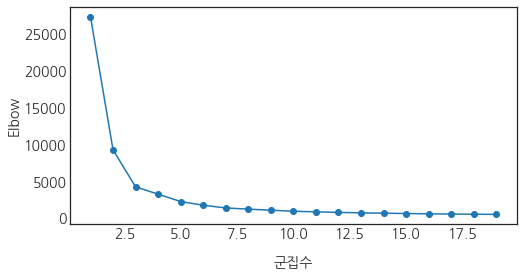

In [35]:
# k-means clustering 수 선정

elbow = []

for i in range(1,20):
    km = KMeans( n_clusters = i, init = 'k-means++', n_init = 10,
                            random_state = 0 )
    km.fit(rfm_scaled_df)
    elbow.append(km.inertia_)
    
plt.figure(figsize = (8, 4))
plt.plot(range(1,20), elbow, marker = 'o')
plt.xlabel('군집수', labelpad = 15)
plt.ylabel('Elbow')
plt.show()

In [36]:
#  왜곡 정도가 매우 높은 데이터 세트에 k-means 을 적용하면, 중심의 개수를 증가키더라도 변별력이 떨어지는 군집화가 수행됨. 
# 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정 후 k-means 평균 수행

# 실루엣 계수 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [37]:
#  군집 갯수 별 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [38]:
model = KMeans(n_clusters = 5, random_state = 22100801)
labels = model.fit_predict(rfm_scaled_df)
rfm_df['군집_km'] = labels
#rfm_df.drop('군집', axis = 1, inplace = True)
print('실루엣 스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, labels)))
rfm_df.head()

실루엣 스코어 : 0.4406


,주문횟수,주문량,주문금액합계,최근성,군집_km
고객_id,,,,,
ja6227,1,2,65900,302,0
ka@12ddd,1,5,49900,302,0
lazurpleur,1,19,36340,302,0
nh@5f65e332,1,1,9900,302,0
pointhj01,2,14,35390,95,2


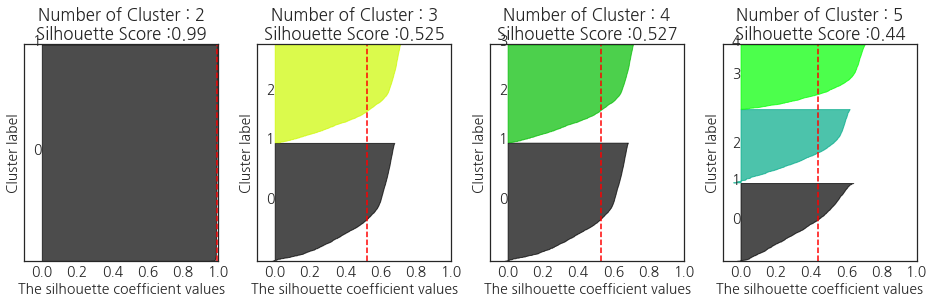

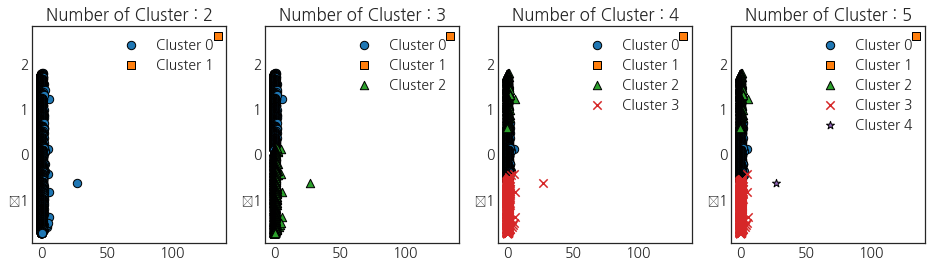

In [39]:
# 실루엣스코어가 0.4406로 제법 좋은 수치임

# 각 군집 별 스토어 확인
visualize_silhouette([2,3,4,5], rfm_scaled_df)
visualize_kmeans_plot_multi([2,3,4,5], rfm_scaled_df)

In [40]:
rfm_df['군집_km'].value_counts()

3    2558
2    2145
0    2110
1       1
4       1
Name: 군집_km, dtype: int64

In [41]:
rfm_scaled_df_k = rfm_scaled_df.copy()
rfm_scaled_df_k['k_labels'] = labels
rfm_scaled_df_k.head()

,0,1,2,3,k_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,2


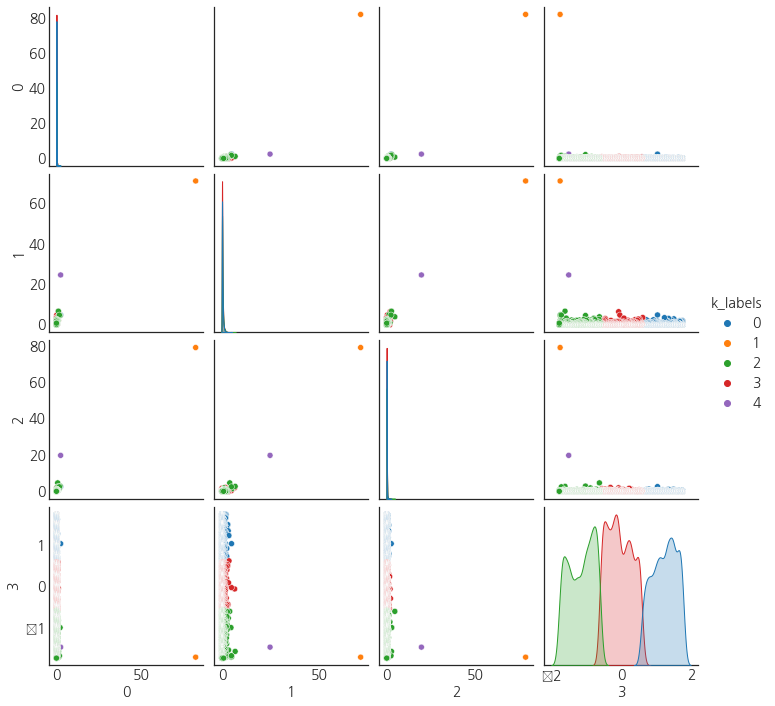

In [42]:
# pairplot으로 Kmeans 군집화 시각화
sns.pairplot(rfm_scaled_df_k, hue = 'k_labels', palette='tab10')
plt.show()

In [43]:
print(rfm_df.loc[rfm_df['군집_km'] == 1])
print('\n')
print('=' * 50)
print('\n')
print(rfm_df.loc[rfm_df['군집_km'] == 4])

            주문횟수   주문량    주문금액합계  최근성  군집_km
고객_id                                       
nh@fde74b0   569  1337  30067850    2      1




          주문횟수  주문량   주문금액합계  최근성  군집_km
고객_id                                   
shenshop    18  465  7550300   23      4


###### (2) Agglomerative Clustering

In [44]:
# Agglomerative Clustering(병합군집)은 시작할 때 각 포인트를 하나의 cluster로 지정하고, 
# 그 다음 종료 조건을 만족할 때가지 가장 비슷한 두 클러스터를 합침

from sklearn.cluster import AgglomerativeClustering as AC

In [45]:
for i in range(2,6):
    ac_model = AC(n_clusters = i, affinity = 'cosine', linkage = 'average')
    ac_labels = ac_model.fit_predict(rfm_scaled_df)
    print('실루엣스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, ac_labels)))
    
rfm_df.head()

실루엣스코어 : 0.5106
실루엣스코어 : 0.5013
실루엣스코어 : 0.1041
실루엣스코어 : 0.0999


,주문횟수,주문량,주문금액합계,최근성,군집_km
고객_id,,,,,
ja6227,1,2,65900,302,0
ka@12ddd,1,5,49900,302,0
lazurpleur,1,19,36340,302,0
nh@5f65e332,1,1,9900,302,0
pointhj01,2,14,35390,95,2


In [46]:
rfm_scaled_df_ac = rfm_scaled_df.copy()

ac_model = AC(n_clusters = 3, affinity = 'cosine', linkage = 'average')
ac_labels = ac_model.fit_predict(rfm_scaled_df)

rfm_scaled_df_ac['ac_labels'] = ac_labels
rfm_scaled_df_ac.head()

,0,1,2,3,ac_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,2


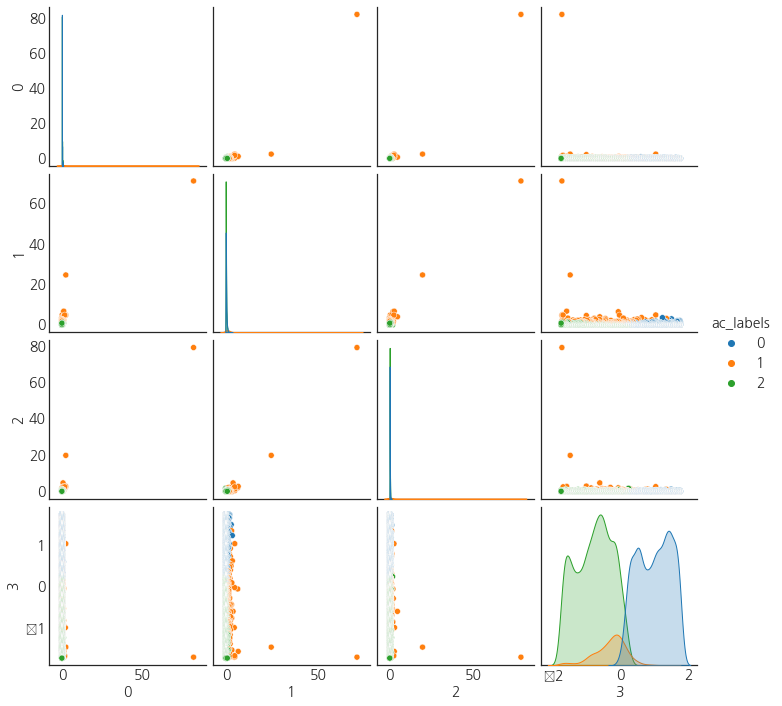

In [47]:
sns.pairplot(rfm_scaled_df_ac, hue = 'ac_labels', palette='tab10')
plt.show()

###### (3) DBSCAN 

In [48]:
from sklearn.cluster  import DBSCAN

In [49]:
ds_model = DBSCAN(eps = 0.5, min_samples = 2)
ds_labels = ds_model.fit_predict(rfm_scaled_df)
print('실루엣스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, ds_labels)))

실루엣스코어 : 0.4181


In [50]:
rfm_scaled_df_ds = rfm_scaled_df.copy()
rfm_scaled_df_ds['ds_labels'] = ds_labels
rfm_scaled_df_ds.head()

,0,1,2,3,ds_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,0


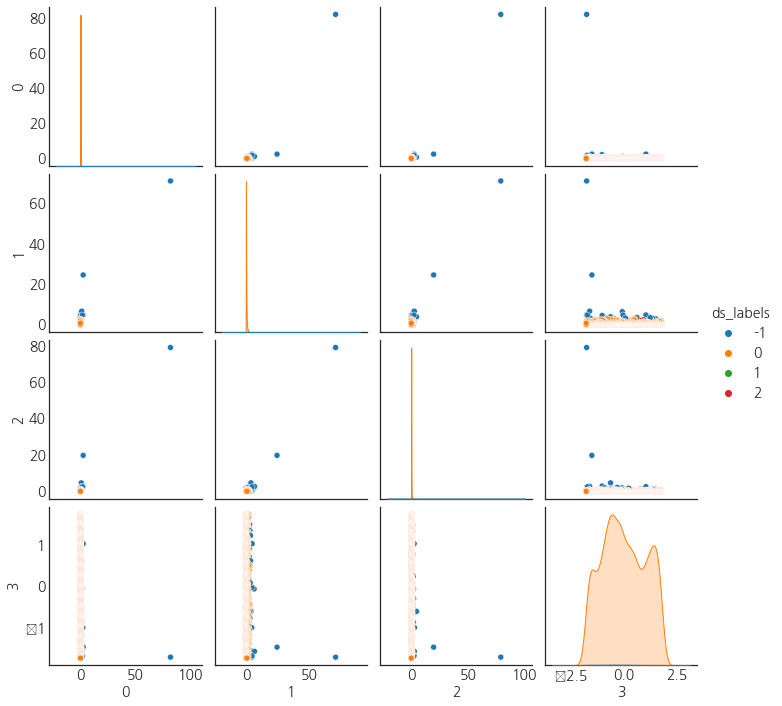

In [51]:
sns.pairplot(rfm_scaled_df_ds, hue = 'ds_labels', palette = 'tab10')
plt.show()

In [52]:
# DBSCAN은 하나의 cluster에 너무 편중되어 있슴 --> Duduworld의 고객세분화에 적합하지 않음. 
rfm_scaled_df_ds['ds_labels'].value_counts()

 0    6780
-1      31
 1       2
 2       2
Name: ds_labels, dtype: int64

#####   ---> K-Means 에 의한 Clustering에  의한 결과값 채택

In [53]:
# Cluster에 따른 각 feature 별 평균

#rfm_df.drop('군집_AC', axis = 1, inplace = True)
rfm_df.head()

rfm_df.groupby('군집_km')['주문횟수',	'주문량',	'주문금액합계',	'최근성'].mean()

,주문횟수,주문량,주문금액합계,최근성
군집_km,,,,
0,1.176303,6.082938,5.760514e+04,256.014218
1,569.000000,1337.000000,3.006785e+07,2.000000
2,1.379487,6.762238,6.778031e+04,52.801865
3,1.286161,6.478890,6.617075e+04,147.343237
4,18.000000,465.000000,7.550300e+06,23.000000


#### 제품 

In [54]:
print('### 주문상품명 기준 건 수(상위 100 건 기준)')
print(' ')
print(df.주문상품명.value_counts().iloc[:100])
print('$' * 50)
print(' ')
print('### 대분류  기준 건 수')
print(' ')
print(df.대분류.value_counts())

### 주문상품명 기준 건 수(상위 100 건 기준)
 
서랍칸 다용도박스 세트                    954
[무료배송] 하프트레이대소 12개세트_투명/화이트     742
실리쿡 계란 레일바스켓 30구                657
유리물병 1000ml 3개                  557
냉장고 냉동실 정리용기 깊은2호 8개세트(아이보리)    474
                               ... 
수납홀더 삼각타입(반투명) 1개/4개/8개          79
트레이중더블 1개                        78
[무료배송] 원더브러쉬 4P + 특별 사은품         77
원형 수납용기 (특하프) 세트                 76
하프트레이소 6개세트_투명/화이트               75
Name: 주문상품명, Length: 100, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
 
### 대분류  기준 건 수
 
냉장고 정리    13616
정리수납용품    11240
유리용품       1565
주방용품        872
생활수납용품      475
기타상품         45
Name: 대분류, dtype: int64


In [64]:
print(df.상품번호.value_counts())
print(df.주문상품명.value_counts())
print(df.주문상품코드.value_counts())

390        954
3520540    742
402        657
180        569
43         561
          ... 
369          1
301          1
3520497      1
3520528      1
3520496      1
Name: 상품번호, Length: 324, dtype: int64
서랍칸 다용도박스 세트                    954
[무료배송] 하프트레이대소 12개세트_투명/화이트     742
실리쿡 계란 레일바스켓 30구                657
유리물병 1000ml 3개                  557
냉장고 냉동실 정리용기 깊은2호 8개세트(아이보리)    474
                               ... 
스텐물병1000ml 1개                     1
마스크쏙! 픽미 3개세트                     1
스윙병 500ml 1개                      1
슬림홈 수납큰바구니小(아이보리)                 1
마스크쏙! 픽미 5개                       1
Name: 주문상품명, Length: 423, dtype: int64
14007000004    489
14007000004    465
14006000106    465
13003000008    343
14004000006    338
              ... 
16004000006      1
14005000007      1
18002000011      1
13004000001      1
15005000004      1
Name: 주문상품코드, Length: 605, dtype: int64


In [55]:
product_by_id = df.groupby('아이디')['상품번호'].apply(list)
product_by_id.head()

아이디
0223cha@naver.com                                  [341, 390, 3519717]
0514lmy                                                      [3519841]
0baltan                                                 [3520972, 959]
1004and              [3520540, 3520546, 3520546, 3520540, 3520540, ...
1204promise                                     [3520551, 390, 107, 1]
Name: 상품번호, dtype: object

In [58]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [61]:
encoder = TransactionEncoder()
te_df = encoder.fit_transform(product_by_id)
te_df = pd.DataFrame(te_df, columns = encoder.columns_, index = product_by_id.index)
te_df.head()

,1,2,5,7,8,9,10,12,23,25,...,3520969,3520970,3520972,3521054,3521055,3521056,3521065,3521066,3521072,3521073
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1004and,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
te_v1_df = te_df.loc[:,te_df.columns[te_df.sum(axis = 0) > 100]]
te_v1_df.head()

,1,2,7,9,10,12,37,38,39,40,...,3520563,3520568,3520569,3520571,3520588,3520644,3520645,3520652,3520653,3520735
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004and,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
p_model = KMeans(n_clusters = 5, random_state = 22100802)
p_label = p_model.fit_predict(te_v1_df)
te_v1_df['km_군집'] = p_label
te_v1_df.head()

,1,2,7,9,10,12,37,38,39,40,...,3520568,3520569,3520571,3520588,3520644,3520645,3520652,3520653,3520735,km_군집
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1004and,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,4
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [81]:
te_v1_df.km_군집.value_counts()

1    4099
0    1174
2     675
4     437
3     430
Name: km_군집, dtype: int64

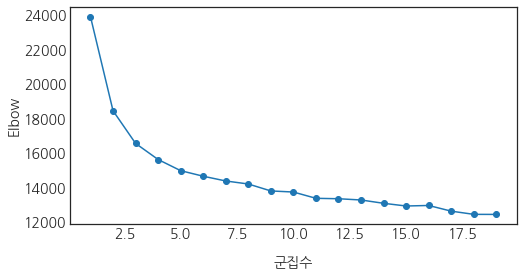

In [82]:
k_elbow = []

for i in range(1, 20):
    km = KMeans( n_clusters = i, init = 'k-means++', n_init = 10,
                            random_state = 0 )
    km.fit(te_v1_df)
    k_elbow.append(km.inertia_)
    
plt.figure(figsize = (8, 4))
plt.plot(range(1,20), k_elbow, marker = 'o')
plt.xlabel('군집수', labelpad = 15)
plt.ylabel('Elbow')
plt.show()

In [83]:
print('시루엣스코어 : {0:.4f}'.format(silhouette_score(te_v1_df, p_label)))

시루엣스코어 : 0.2085


1    4099
0    1174
2     675
4     437
3     430
Name: km_군집, dtype: int64


<AxesSubplot:>

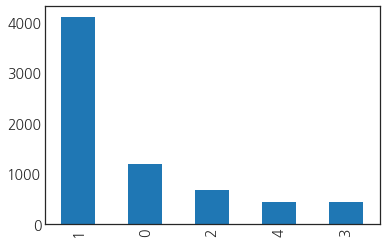

In [85]:
# Cluster 크기 확인
cluster_size = te_v1_df.km_군집.value_counts()
print(cluster_size)
cluster_size.plot(kind = 'bar')

In [93]:
# Cluster 별 분석을 위한 Dataframe 정리
rfm_df.head()

,고객_id,주문횟수,주문량,주문금액합계,최근성,군집_km
0,ja6227,1,2,65900,302,0
1,ka@12ddd,1,5,49900,302,0
2,lazurpleur,1,19,36340,302,0
3,nh@5f65e332,1,1,9900,302,0
4,pointhj01,2,14,35390,95,2


In [101]:
cluster_df.rename(columns = {'고객_id' : '아이디'}, inplace = True)
cluster_df.head()

,아이디,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [95]:
rfm_df.rename(columns = {'고객_id' : '아이디'}, inplace = True)
rfm_df.head()

,아이디,주문횟수,주문량,주문금액합계,최근성,군집_km
0,ja6227,1,2,65900,302,0
1,ka@12ddd,1,5,49900,302,0
2,lazurpleur,1,19,36340,302,0
3,nh@5f65e332,1,1,9900,302,0
4,pointhj01,2,14,35390,95,2


In [115]:
customer_df = pd.merge(cluster_df, rfm_df, how = 'outer', on = '아이디')
customer_df.drop(['주문횟수_y',	'주문량_y',	'주문금액합계_y',	'최근성_y'], axis = 1, inplace = True)
customer_df.head()
customer_df.나이.value_counts()

확인불가    557
43      322
49      245
41      244
44      244
       ... 
119       1
120       1
122       1
84        1
123       1
Name: 나이, Length: 66, dtype: int64

In [99]:
full_df = pd.merge(df, rfm_df, how = 'outer', on = '아이디')
full_df.head()
full_df.아이디.value_counts()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 27812
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               27813 non-null  object 
 1   품목별 주문번호           27813 non-null  object 
 2   배송번호               27813 non-null  object 
 3   주문상품코드             27813 non-null  object 
 4   주문상품명              27813 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  6598 non-null   object 
 6   옵션별상품코드            27813 non-null  object 
 7   주문품목 수량            27813 non-null  int64  
 8   주문품목 단가            27813 non-null  int64  
 9   주문품목 결제금액          27813 non-null  int64  
 10  주문일시               27813 non-null  object 
 11  주문경로               26931 non-null  object 
 12  주문검색어              21152 non-null  object 
 13  구매횟수               27812 non-null  float64
 14  결제금액(주문전체)         27813 non-null  int64  
 15  결제금액(품목별)          27813 non-null  int64  
 16  결제방법               278

### Cluster  Analysis : 고객 성향 분석 및 제품 분석
####    
#####         1. 고객 성향 분석 : 활용 데이터 --> Dataframe  'customer_df'
#####        2. 제품 분석 : 활용 데이터 --> Dataframe 'full_df'

In [125]:
# 고객 별 나이 분석
pd.crosstab(customer_df.군집_km, customer_df.나이)
#customer_df.replace({'나이' : '확인불가'}, 0, inplace = True)
#customer_df = customer_df.astype({'나이' : 'int'})
#customer_df.info()

나이,0,3,4,5,6,18,20,21,22,23,...,70,71,73,74,75,84,119,120,122,123
군집_km,,,,,,,,,,,,,,,,,,,,,
0,230,2,1,3,0,0,1,2,4,5,...,3,3,0,2,2,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,127,2,0,2,0,0,0,1,0,2,...,1,2,1,1,0,1,1,1,1,1
3,199,3,3,2,2,1,0,1,4,2,...,3,3,0,2,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
def get_age_bins(x):
    if x == 0 :
        age = 'NA'
    elif x < 10 :
        age = '소아'
    elif x < 20 : 
        age = '10대'
    elif x < 30 : 
        age = '20대'
    elif x < 40 : 
        age = '30대'
    elif x < 50 : 
        age = '40대'
    elif x < 60 : 
        age = '50대'
    elif x < 70 : 
        age = '60대'
    elif x < 80 : 
        age = '70대'
    elif x < 90 : 
        age = '80대'
    elif x < 100 : 
        age = '90대'
    else : 
        age = '고령'
    return age 

In [132]:
customer_df['나이대'] = customer_df['나이'].apply(lambda  x : get_age_bins(x)) # 나이 정보가 없는 곳은 '0'으로 대체 및 나이대는 'NA' 로 변환
customer_df.rename(columns = {'최근성_x' : '최근성'}, inplace = True)
customer_df.head()

,아이디,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법,군집_km,나이대
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드,0,60대
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드,0,30대
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드,0,40대
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,0,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제),0,NA
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금,2,40대


In [134]:
pd.crosstab(customer_df.군집_km, customer_df.나이대, margins = True)

나이대,10대,20대,30대,40대,50대,60대,70대,80대,NA,고령,소아,All
군집_km,,,,,,,,,,,,
0,0,72,523,719,449,101,10,0,230,0,6,2110
1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,73,556,747,542,86,5,1,127,4,4,2145
3,1,76,692,920,539,112,9,0,199,0,10,2558
4,0,0,0,0,1,0,0,0,0,0,0,1
All,1,221,1771,2386,1531,299,24,1,557,4,20,6815


Text(0.0, 1.0, '군집3')

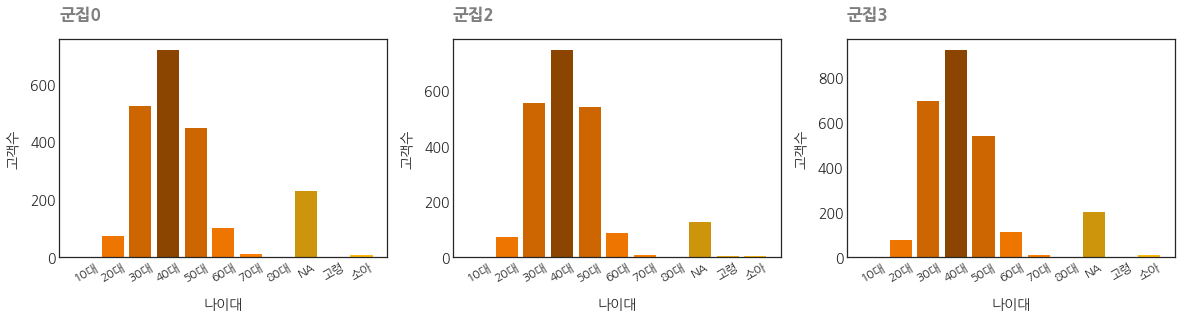

In [146]:
# 군집별 연령대별 분포 시각화

plt.figure(figsize = (20, 4))

age_bins = ['10대',	'20대',	'30대',	'40대',	'50대',	'60대',	'70대',	'80대',	'NA',	'고령',	'소아']
colors = ['#FF7F00',	"#EE7600",	"#CD6600",	'#8B4500',	'#CD6600',	'#EE7600',	'#FF7F00',	'#FF8C00',	'#CD950C',	'#EEAD0E',	'#FFB90F']
index = np.arange(len(age_bins))

plt.subplot(1,3,1)
age = [0,	72,	523,	719,	449,	101,	10,	0,	230,	0,	6]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집0', loc = 'left', pad = 20,  color = '#7F7F7F', fontweight = 'bold')

plt.subplot(1,3,2)
age = [0,	73,	556,	747,	542,	86,	5,	1,	127,	4,	4]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집2', loc = 'left', pad = 20, color = '#7F7F7F', fontweight = 'bold')

plt.subplot(1,3,3)
age = [1,	76,	692,	920,	539,	112,	9,	0,	199,	0,	10]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집3', loc = 'left', pad = 20, color = '#7F7F7F', fontweight = 'bold')
